In [2]:
require(ggplot2, warn.conflicts = FALSE);
require(tidyverse, warn.conflicts = FALSE);
require(cowplot, warn.conflicts = FALSE);
library(lubridate)
library(scales)

In [3]:
#to have some code only run once:
n=1

In [4]:
paste('a','b', sep='')

[1] "ab"

In [5]:
saveplot <- function(filename, plotobj, width=11, height=6, useDingbats=FALSE){
    ggsave(paste(filename,'.pdf', sep=''), plotobj, width=width, height=height, useDingbats=useDingbats)
}

## Plots to create:
- plot: compare regimes - directly contrast in same plot!
it has to be plausible:
- plot: compare PFT to HPLC data
- modify grazing?
- constant mixing increases with X25.8 depth

In [6]:
outarray_full <- read.csv("outarray_full.csv")

In [7]:
head(outarray_full)

outarray_full$date <- as.Date(outarray_full$date)

X,date,time,N,Si,P1,P2,Z,D,PTempDepGrow,...,SiMixing,ZLosses,ZUnassimFeedDetritus,DGains,DRemin,DZooGrazed,DSinking,DLosses,NMixing,ZUnassimFeedNitrate
0,1993-01-15,0,2.000000,2.000000,0.1000000,0.10000000,0.10000000,0.1000000,0.000000,...,0.00000000,0.0000000000,0.00000000,0.000000000,0.0000000000,0.000000000,0.000000000,0.0000000,0.0000000000,0.000000000
1,1993-01-16,1,2.079550,2.054547,0.1001479,0.09974243,0.09484497,0.1228704,1.818703,...,0.01181841,0.0007963991,0.05065546,0.002115005,0.0002847881,0.002115005,0.004514799,0.2078767,0.0004431575,0.007997883
2,1993-01-17,2,2.155953,2.106834,0.1006584,0.09970865,0.09003313,0.1450028,2.727113,...,0.01729316,0.0011934983,0.07568131,0.003454948,0.0004983598,0.003454948,0.007408257,0.3082726,0.0006641241,0.011999520
3,1993-01-18,3,2.229263,2.156904,0.1015090,0.09987587,0.08554312,0.1664848,3.634783,...,0.02245165,0.0015939463,0.10055313,0.005012893,0.0007722528,0.005012893,0.010798039,0.4059373,0.0008869540,0.016016171
4,1993-01-19,4,2.299530,2.204791,0.1026814,0.10022455,0.08135452,0.1873977,4.541725,...,0.02731899,0.0020005338,0.12534143,0.006782748,0.0011079096,0.006782748,0.014673405,0.5009580,0.0011132003,0.020058268
5,1993-01-20,5,2.366801,2.250530,0.1041610,0.10073776,0.07744795,0.2078172,5.447950,...,0.03191814,0.0024154128,0.15011165,0.008759203,0.0015057987,0.008759203,0.019024205,0.5934187,0.0013440603,0.024135553


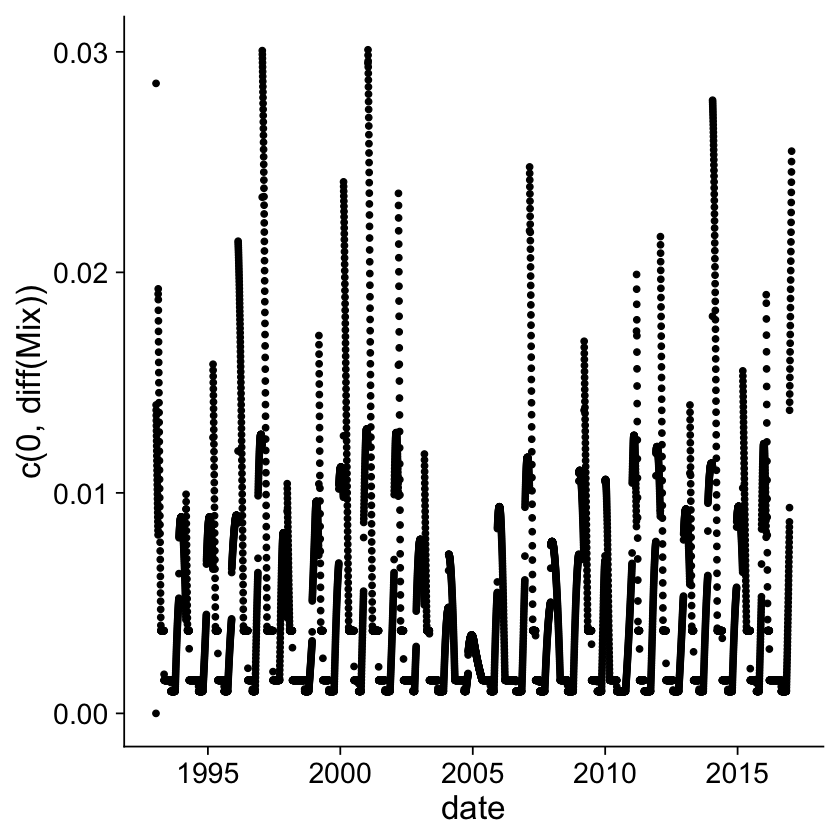

In [8]:
ggplot(data=outarray_full) + geom_point(aes(x=date, y=c(0,diff(Mix)))) + theme_cowplot(20)

In [9]:
modelout_reg1 <- read.csv("modelout_reg1.csv")
modelout_reg2 <- read.csv("modelout_reg2.csv")

In [10]:
outarray_full_reg1 = outarray_full[outarray_full$date > as.Date(head(modelout_reg1$date, n=1)) & outarray_full$date < as.Date(tail(modelout_reg1$date, n=1)),]

outarray_full_reg2 = outarray_full[outarray_full$date > as.Date(head(modelout_reg2$date, n=1)) & outarray_full$date < as.Date(tail(modelout_reg2$date, n=1)),]

In [11]:
#library(lubridate)
#yday(outarray_full_reg1$date)

In [12]:
if(n==1){outarray_full_reg2 <- outarray_full_reg2[0:1763,]}
nrow(outarray_full_reg1)
nrow(outarray_full_reg2)

[1] 1763

[1] 1763

In [13]:
mean(diff(outarray_full_reg1$Mix),na.rm=T)
sd(diff(outarray_full_reg1$Mix),na.rm=T)
mean(diff(outarray_full_reg2$Mix),na.rm=T)
sd(diff(outarray_full_reg2$Mix),na.rm=T)

[1] 0.005476115

[1] 0.005496789

[1] 0.003945916

[1] 0.003932686

Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

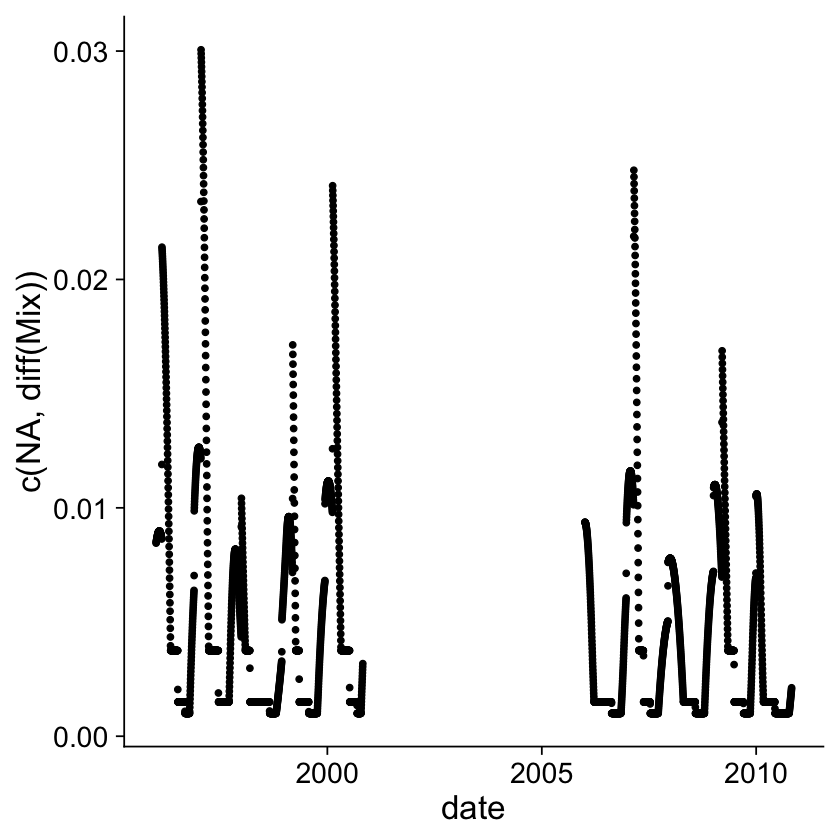

In [14]:
ggplot(data=outarray_full_reg1) + geom_point(aes(x=date, y=c(NA,diff(Mix)))) +
geom_point(data=outarray_full_reg2, aes(x=date, y=c(NA,diff(Mix)))) + theme_cowplot(20)

In [15]:
head(modelout_reg1)

modelout_reg1$date <- as.Date(modelout_reg1$date)

modelout_reg2$date <- as.Date(modelout_reg2$date)

X,N,Si,PFT_all,PFT_1,PFT_2,Zall,Det,time,date
0,4.006931,2.346401,0.2742426,0.1620021,0.1122406,0.2425763,0.7241027,1082,1996-01-01
1,4.021041,2.356309,0.2790245,0.1674076,0.1116168,0.2446122,0.7302116,1083,1996-01-02
2,4.034595,2.365404,0.2838504,0.1728864,0.1109641,0.2467974,0.7364750,1084,1996-01-03
3,4.047595,2.373684,0.2887083,0.1784263,0.1102820,0.2491380,0.7428831,1085,1996-01-04
4,4.060048,2.381148,0.2935850,0.1840143,0.1095706,0.2516404,0.7494244,1086,1996-01-05
5,4.071963,2.387798,0.2984665,0.1896365,0.1088300,0.2543106,0.7560860,1087,1996-01-06


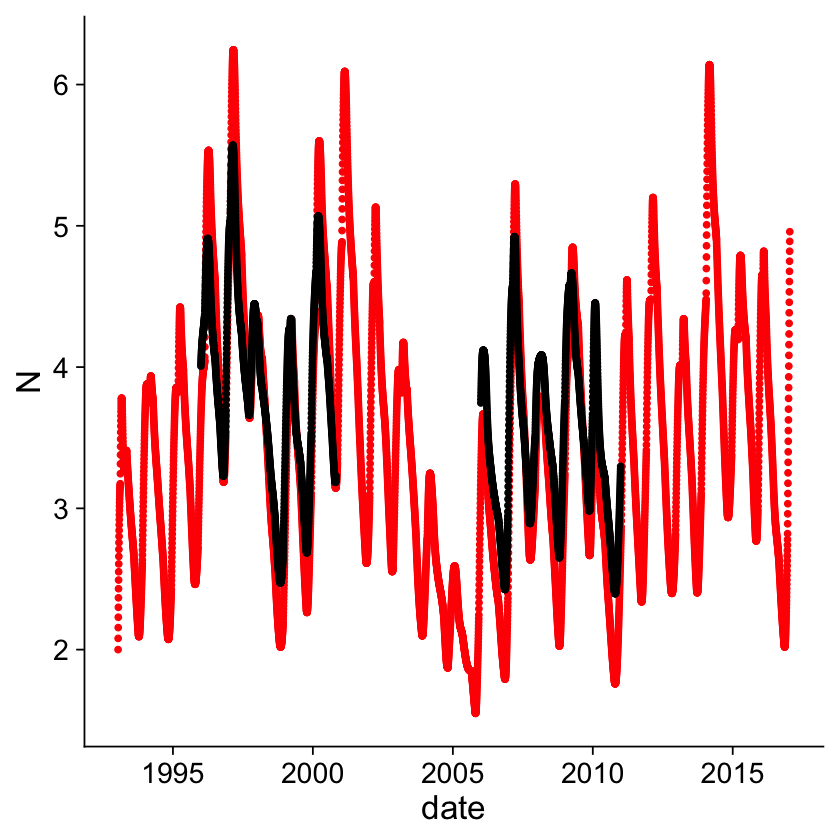

In [16]:
ggplot() + 
geom_point(data=outarray_full, aes(x=date,y=N), col='red') +geom_point(data=modelout_reg1, aes(x=date, y=N)) + 
geom_point(data=modelout_reg2, aes(x=date, y=N)) + theme_cowplot(20) 

In [17]:
forcing_reg1 <- read.csv("forcing_reg1.csv")
forcing_reg2 <- read.csv("forcing_reg2.csv")

In [18]:
head(forcing_reg1)

forcing_reg1$date <- as.Date(forcing_reg1$date)
forcing_reg2$date <- as.Date(forcing_reg2$date)

X,NOX,SiOX,x258,PAR,Tmld,time,yday,date
0,9.295853,6.738255,84.26701,47.65527,23.07460,1082,1,1996-01-01
1,9.295853,6.738255,83.80338,47.72250,23.04187,1083,2,1996-01-02
2,9.295853,6.738255,83.33753,47.79096,23.00970,1084,3,1996-01-03
3,9.295853,6.738255,82.86952,47.86059,22.97812,1085,4,1996-01-04
4,9.295853,6.738255,82.39941,47.93133,22.94710,1086,5,1996-01-05
5,9.295853,6.738255,81.92726,48.00310,22.91666,1087,6,1996-01-06


In [19]:
# READ VERIFICATION

BoxVSatDepth <- read.csv("../Data/NewestData/BoxVSatDepth_02.csv")
CHLA_df <- read.csv("../Data/NewestData/HPLCPinckneyTotAndSpec_03.csv")
ZOO_df <- read.csv("../Data/NewestData/ZooplanktonData_05.csv")

In [20]:
BoxVSatDepth$date <- as.Date(BoxVSatDepth$date)
BoxVSatDepth$month <- as.integer(BoxVSatDepth$month)
CHLA_df$date <- as.Date(CHLA_df$date)
ZOO_df$date <- as.Date(ZOO_df$date)

In [21]:
BoxVSatDepth_reg1 = BoxVSatDepth[BoxVSatDepth$date > head(modelout_reg1$date, n=1) & BoxVSatDepth$date < tail(modelout_reg1$date, n=1),]
BoxVSatDepth_reg2 = BoxVSatDepth[BoxVSatDepth$date > head(modelout_reg2$date, n=1) & BoxVSatDepth$date < tail(modelout_reg2$date, n=1),]

In [22]:
CHLA_df_reg1 = CHLA_df[CHLA_df$date > head(modelout_reg1$date, n=1) & CHLA_df$date < tail(modelout_reg1$date, n=1),]
CHLA_df_reg2 = CHLA_df[CHLA_df$date > head(modelout_reg2$date, n=1) & CHLA_df$date < tail(modelout_reg2$date, n=1),]

In [23]:
ZOO_df_reg1 = ZOO_df[ZOO_df$date > head(modelout_reg1$date, n=1) & ZOO_df$date < tail(modelout_reg1$date, n=1),]
ZOO_df_reg2 = ZOO_df[ZOO_df$date > head(modelout_reg2$date, n=1) & ZOO_df$date < tail(modelout_reg2$date, n=1),]

In [24]:
if (n==1){
    BoxVSatDepth_reg2 <- BoxVSatDepth_reg2[0:1763,]
    CHLA_df_reg2 <- CHLA_df_reg2[0:1763,]
    ZOO_df_reg2 <- ZOO_df_reg2[0:1763,]
}
n = 2

# Start plotting final plots here:

### First Plot:
- plot: compare regimes - directly contrast in same plot!

In [57]:
options(repr.plot.width=11, repr.plot.height=6)

In [58]:
colours <- c('#663399', '#CC6633')
names(colours) <- c('Time 1', 'Time 2')

In [59]:
combinedataframes <- function(df_reg1, df_reg2){
    df_reg1$reg <- 'Time 1'
    df_reg2$reg <- 'Time 2'
    
    df_both = rbind(df_reg1, df_reg2)
    
    return(df_both)
}

In [60]:
outarray_full_bothreg <- combinedataframes(outarray_full_reg1, outarray_full_reg2)

BoxVSatDepth_bothreg <- combinedataframes(BoxVSatDepth_reg1, BoxVSatDepth_reg2)

CHLA_df_bothreg <- combinedataframes(CHLA_df_reg1, CHLA_df_reg2)

In [61]:
cat(names(BoxVSatDepth_reg1))
print('\n')
cat(names(outarray_full_bothreg))
print('\n')
cat(names(CHLA_df_bothreg))

X date Temperature_Box Temperature_AtDepth NO3_NO2_USF_Box NO3_NO2_USF_AtDepth NO3_UDO_Box NO3_UDO_AtDepth SiO4_USF_Box SiO4_USF_AtDepth SiO4_UDO_Box SiO4_UDO_AtDepth PO4_USF_Box PO4_USF_AtDepth PO4_UDO_Box PO4_UDO_AtDepth Sigma_t_Box Sigma_t_AtDepth Salinity_bottles_Box Salinity_bottles_AtDepth Salinity_CTD_Box Salinity_CTD_AtDepth O2_umol_kg_Box O2_umol_kg_AtDepth POC_ug_kg_Box POC_ug_kg_AtDepth POC_ug_L_Box POC_ug_L_AtDepth PN_ug_L_Box PN_ug_L_AtDepth C_N_particulate_Box C_N_particulate_AtDepth PON_ug_kg_Box PON_ug_kg_AtDepth PIP_Box PIP_AtDepth DOC_Box DOC_AtDepth DON_Box DON_AtDepth DOP_Box DOP_AtDepth TOC_Box TOC_AtDepth PrimaryProductivity_Box PrimaryProductivity_AtDepth Chlorophyll_Box Chlorophyll_AtDepth Phaeopigments_Box Phaeopigments_AtDepth Total_Prokaryotes_Box Total_Prokaryotes_AtDepth Bact_Biomass_mgC_m3_Box Bact_Biomass_mgC_m3_AtDepth yday month[1] "\n"
X date time N Si P1 P2 Z D PTempDepGrow PNutUptake PLightHarv PGains Mix X.1 PMortality PZooGrazed PSinking PLosses ZG

Warning message:
“Removed 28 rows containing missing values (geom_point).”Warning message:
“Removed 192 rows containing missing values (geom_point).”Warning message:
“Removed 1707 rows containing missing values (geom_point).”Warning message:
“Removed 1763 rows containing missing values (geom_point).”Warning message:
“Removed 1730 rows containing non-finite values (stat_boxplot).”

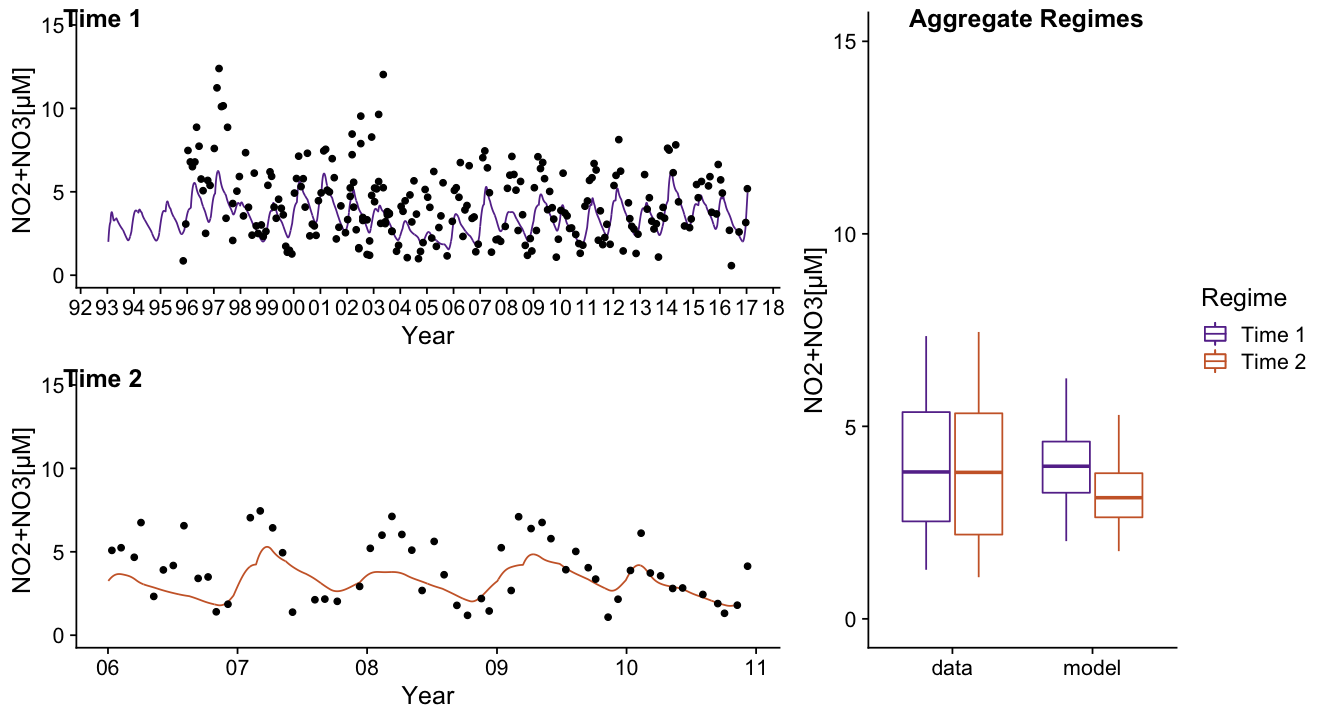

In [62]:
p1 <- ggplot() + 
    geom_line(data=outarray_full, aes(date, N), col=colours[1]) +
    geom_point(data=BoxVSatDepth, aes(date, NO3_NO2_USF_Box)) +
    geom_point(data=BoxVSatDepth, aes(date, NO3_UDO_Box)) +
    theme_cowplot(15) + ylim(0,15)+
    scale_x_date(date_breaks = "years", labels = date_format('%y'))+
    ylab('NO2+NO3[µM]') + xlab('Year') 

p2 <- ggplot() +
    geom_line(data=outarray_full_reg2, aes(date, N), col=colours[2]) +
    geom_point(data=BoxVSatDepth_reg2, aes(date, NO3_NO2_USF_Box)) +
    geom_point(data=BoxVSatDepth_reg2, aes(date, NO3_UDO_Box)) +
    theme_cowplot(15)+ ylim(0,15)+
    scale_x_date(date_breaks = "years", labels = date_format('%y'))+
    ylab('NO2+NO3[µM]') + xlab('Year') 

p3 <- ggplot() +
      geom_boxplot(data=outarray_full_bothreg, aes('model', N, col=reg)) +
      geom_boxplot(data=BoxVSatDepth_bothreg, aes('data', NO3_NO2_USF_Box, col=reg)) +
      theme_cowplot(15)+ xlab('') + ylim(0,15)+
      ylab('NO2+NO3[µM]') + scale_color_manual(values=colours) + labs(col='Regime')

x1 <- plot_grid(p1, p2, labels = c('Time 1', 'Time 2'), label_size=15,hjust = -0.8, ncol=1)

plot_grid(x1, p3, labels = c('', 'Aggregate Regimes'), label_size = 15, ncol=2, rel_widths = c(3,2)) 

In [63]:
CtoChla = 50  # g/g
MolarMassC = 12.0107
CtoNratioPhyto = 6.625
muMolartoChlaconvfactor = CtoChla / MolarMassC / CtoNratioPhyto  # Chla as mg/m-3 to


Warning message:
“Removed 23 rows containing missing values (geom_point).”Warning message:
“Removed 33 rows containing missing values (geom_point).”Warning message:
“Removed 1707 rows containing missing values (geom_point).”Warning message:
“Removed 1730 rows containing non-finite values (stat_boxplot).”

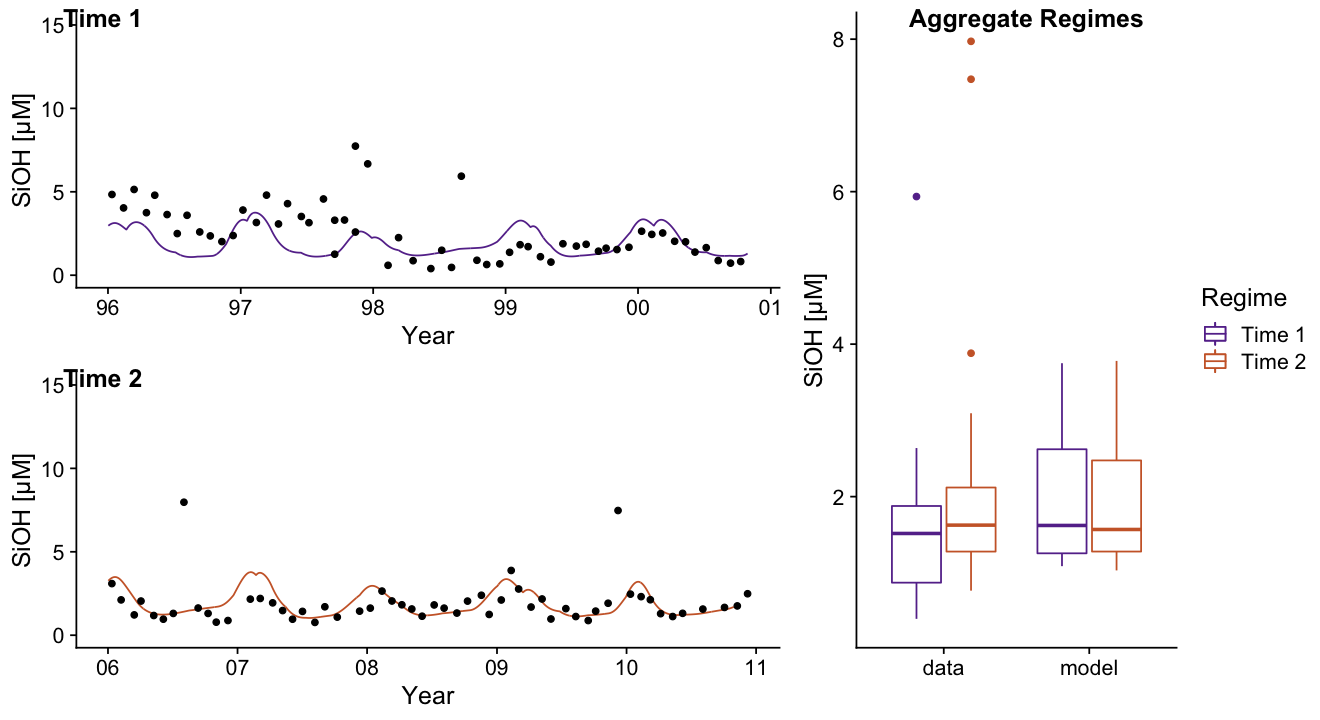

In [64]:
var_modelout = 'Si'
var_envdat = 'SiO4_USF_Box'
ylabel = 'SiOH [µM]'
ymax = 15

p1 <- ggplot() + 
    geom_line(data=outarray_full_reg1, aes(date, !!ensym(var_modelout) + P2), col=colours[1]) +
    geom_point(data=BoxVSatDepth_reg1, aes(date, !!ensym(var_envdat)* muMolartoChlaconvfactor)) +
    geom_point(data=BoxVSatDepth_reg1, aes(date, SiO4_UDO_Box)) +
    theme_cowplot(15) + ylim(0,ymax)+
    scale_x_date(date_breaks = "years", labels = date_format('%y'))+
    ylab(ylabel) + xlab('Year') 

p2 <- ggplot() +
    geom_line(data=outarray_full_reg2, aes(date, !!ensym(var_modelout) + P2), col=colours[2]) +
    geom_point(data=BoxVSatDepth_reg2, aes(date, !!ensym(var_envdat) * muMolartoChlaconvfactor)) +
    #geom_point(data=BoxVSatDepth_reg2, aes(date, SiO4_UDO_Box)) +
    theme_cowplot(15)+ ylim(0,ymax)+
    scale_x_date(date_breaks = "years", labels = date_format('%y'))+
    ylab(ylabel) + xlab('Year') 

p3 <- ggplot() +
      geom_boxplot(data=outarray_full_bothreg, aes('model', !!ensym(var_modelout)+P2, col=reg)) +
      geom_boxplot(data=BoxVSatDepth_bothreg, aes('data', !!ensym(var_envdat) * muMolartoChlaconvfactor, col=reg)) +
      theme_cowplot(15)+ xlab('') + #ylim(0,ymax)+
      ylab(ylabel) + scale_color_manual(values=colours) + labs(col='Regime')

x1 <- plot_grid(p1, p2, labels = c('Time 1', 'Time 2'), label_size=15, hjust = -0.8, ncol=1)

#SiOHregplot <- 
plot_grid(x1, p3, labels = c('', 'Aggregate Regimes'), label_size = 15, ncol=2, rel_widths = c(3,2)) 

In [65]:
#saveplot("SiOH_Regimes", SiOHregplot)

In [83]:
var_modelout = 'P2'
var_envdat = 'Tchla'
ylabel = 'non-diatom Chl a [µM N]'
ymax = 1

p1 <- ggplot() + 
    geom_line(data=outarray_full_reg1, aes(date, !!ensym(var_modelout) ), col=colours[1]) +
    geom_point(data=CHLA_df_reg1, aes(date, (!!ensym(var_envdat) - Diatom1)* muMolartoChlaconvfactor / 100)) +
    #geom_point(data=BoxVSatDepth_reg1, aes(date, NO3_UDO_Box)) +
    theme_cowplot(15) + ylim(0,ymax)+
    scale_x_date(date_breaks = "years", labels = date_format('%y'))+
    #ylab(ylabel) + 
    xlab('Year') 

p2 <- ggplot() +
    geom_line(data=outarray_full_reg2, aes(date, !!ensym(var_modelout)), col=colours[2]) +
    geom_point(data=CHLA_df_reg2, aes(date, (!!ensym(var_envdat)- Diatom1) * muMolartoChlaconvfactor / 100)) +
    #geom_point(data=BoxVSatDepth_reg2, aes(date, NO3_UDO_Box)) +
    theme_cowplot(15)+ ylim(0,ymax)+
    scale_x_date(date_breaks = "years", labels = date_format('%y'))+
    ylab(ylabel) + xlab('Year') 

p3 <- ggplot() +
      geom_boxplot(data=outarray_full_bothreg, aes('model', !!ensym(var_modelout), col=reg)) +
      geom_boxplot(data=CHLA_df_bothreg, aes('data', (!!ensym(var_envdat) - Diatom1)* muMolartoChlaconvfactor / 100, col=reg)) +
      theme_cowplot(15)+ xlab('') + #ylim(0,ymax)+
      ylab(ylabel) + scale_color_manual(values=colours) + labs(col='Regime')

x1 <- plot_grid(p1, p2, labels = c('Time 1', 'Time 2'), label_size=15, hjust = -0.8, ncol=1)

nondiatomHPLCChla <- plot_grid(x1, p3, labels = c('', 'Aggregate Regimes'), label_size = 15, ncol=2, rel_widths = c(3,2)) 

Warning message:
“Removed 1712 rows containing missing values (geom_point).”Warning message:
“Removed 1712 rows containing non-finite values (stat_boxplot).”

In [84]:
#ggsave("nondiatomHPLCChla.pdf", nondiatomHPLCChla, width=11, height=6)

In [85]:
var_modelout = 'P1'
var_envdat = 'Diatom1'
ylabel = 'DIATOM Chl a [µM N]'
ymax = 1

p1 <- ggplot() + 
    geom_line(data=outarray_full_reg1, aes(date, !!ensym(var_modelout) ), col=colours[1]) +
    geom_point(data=CHLA_df_reg1, aes(date, !!ensym(var_envdat)* muMolartoChlaconvfactor / 100)) +
    #geom_point(data=BoxVSatDepth_reg1, aes(date, NO3_UDO_Box)) +
    theme_cowplot(15) + ylim(0,ymax)+
    scale_x_date(date_breaks = "years", labels = date_format('%y'))+
    #ylab(ylabel) + 
    xlab('Year') 

p2 <- ggplot() +
    geom_line(data=outarray_full_reg2, aes(date, !!ensym(var_modelout)), col=colours[2]) +
    geom_point(data=CHLA_df_reg2, aes(date, !!ensym(var_envdat) * muMolartoChlaconvfactor / 100)) +
    #geom_point(data=BoxVSatDepth_reg2, aes(date, NO3_UDO_Box)) +
    theme_cowplot(15)+ ylim(0,ymax)+
    scale_x_date(date_breaks = "years", labels = date_format('%y'))+
    ylab(ylabel) + xlab('Year') 

p3 <- ggplot() +
      geom_boxplot(data=outarray_full_bothreg, aes('model', !!ensym(var_modelout), col=reg)) +
      geom_boxplot(data=CHLA_df_bothreg, aes('data', !!ensym(var_envdat) * muMolartoChlaconvfactor / 100, col=reg)) +
      theme_cowplot(15)+ xlab('') + #ylim(0,ymax)+
      ylab(ylabel) + scale_color_manual(values=colours) + labs(col='Regime')

x1 <- plot_grid(p1, p2, labels = c('Time 1', 'Time 2'), label_size=15, hjust = -0.8, ncol=1)

DIATOM_regcomp <- plot_grid(x1, p3, labels = c('', 'Aggregate Regimes'), label_size = 15, ncol=2, rel_widths = c(3,2))

Warning message:
“Removed 1712 rows containing missing values (geom_point).”Warning message:
“Removed 1712 rows containing non-finite values (stat_boxplot).”

In [86]:
options(repr.plot.width=10, repr.plot.height=15)

In [87]:
datelim1 = as.Date('1995-10-01')
datelim2 = as.Date('2017-02-01')

linealpha = 0.5
ts1linecol = 'red'
ts2linecol = 'blue'

NO3plot <- ggplot() + 
    geom_line(data=outarray_full, aes(date, N), col=colours[1]) +
    geom_point(data=BoxVSatDepth, aes(date, NO3_NO2_USF_Box)) +
    #geom_point(data=BoxVSatDepth, aes(date, NO3_UDO_Box)) +
    theme_cowplot(15) + ylim(0,15)+
    scale_x_date(date_breaks = "years", labels = date_format('%y'), limits=c(datelim1,datelim2))+
    ylab('NO2+NO3[µM]') + xlab('Year') +
    # Time 1
    geom_vline(xintercept=as.Date('1996-01-01'), alpha = linealpha, col=ts1linecol)+
    geom_vline(xintercept=as.Date('2000-10-30'), alpha = linealpha, col=ts1linecol)+
    
    # Time 2
    geom_vline(xintercept=as.Date('2006-06-30'), alpha = linealpha, col=ts2linecol)+
    geom_vline(xintercept=as.Date('2010-12-31'), alpha = linealpha, col=ts2linecol)
    


SiOHplot <- ggplot() + 
    geom_line(data=outarray_full, aes(date, Si), col=colours[1]) +
    geom_point(data=BoxVSatDepth, aes(date, SiO4_USF_Box)) +
    #geom_point(data=BoxVSatDepth, aes(date, NO3_UDO_Box)) +
    theme_cowplot(15) + ylim(0,15)+
    scale_x_date(date_breaks = "years", labels = date_format('%y'), limits=c(datelim1,datelim2))+
    ylab('SiOH[µM]') + xlab('Year') +
    # Time 1
    geom_vline(xintercept=as.Date('1996-01-01'), alpha = linealpha, col=ts1linecol)+
    geom_vline(xintercept=as.Date('2000-10-30'), alpha = linealpha, col=ts1linecol)+
    
    # Time 2
    geom_vline(xintercept=as.Date('2006-06-30'), alpha = linealpha, col=ts2linecol)+
    geom_vline(xintercept=as.Date('2010-12-31'), alpha = linealpha, col=ts2linecol)



mggramstograms = 1 / 1000
Cperdryweight = 0.32
# Wiebe et al. 1975 : Carbon was 31-33% ofdryweight
molarmassCarbon = 12.01  # grams per mole
CtonNratioZoo = 5.625
mgDWtomuMolarZOO = mggramstograms / Cperdryweight / molarmassCarbon / CtonNratioZoo * 1000  # µM

ZOOSplot <- ggplot() + 
    geom_line(data=outarray_full, aes(date, Z), col=colours[1]) +

    geom_point(data=ZOO_df, aes(date, BIOMASS_200 * mgDWtomuMolarZOO)) +
    #geom_point(data=ZOO_df, aes(date, BIOMASS_500 * mgDWtomuMolarZOO), col='blue') +    
    theme_cowplot(15) + ylim(0,2)+
    scale_x_date(date_breaks = "years", labels = date_format('%y'), limits=c(datelim1,datelim2))+
    ylab('Z Biomass [µM N]') + xlab('Year') +
    # Time 1
    geom_vline(xintercept=as.Date('1996-01-01'), alpha = linealpha, col=ts1linecol)+
    geom_vline(xintercept=as.Date('2000-10-30'), alpha = linealpha, col=ts1linecol)+
    
    # Time 2
    geom_vline(xintercept=as.Date('2006-06-30'), alpha = linealpha, col=ts2linecol)+
    geom_vline(xintercept=as.Date('2010-12-31'), alpha = linealpha, col=ts2linecol)
    

In [89]:
FullNSiPPZDplot <- plot_grid(NO3plot, SiOHplot, nondiatomHPLCChla, DIATOM_regcomp,ZOOSplot, ncol=1, rel_heights = c(0.5,0.5,1,1, 0.5))

Warning message:
“Removed 989 rows containing missing values (geom_path).”Warning message:
“Removed 28 rows containing missing values (geom_point).”Warning message:
“Removed 989 rows containing missing values (geom_path).”Warning message:
“Removed 29 rows containing missing values (geom_point).”Warning message:
“Removed 989 rows containing missing values (geom_path).”Warning message:
“Removed 1533 rows containing missing values (geom_point).”

In [91]:
saveplot('FullNSiPPZDplot', FullNSiPPZDplot, width=10,height=15)

Warning message:
“Removed 1706 rows containing missing values (geom_point).”Warning message:
“Removed 1706 rows containing non-finite values (stat_boxplot).”

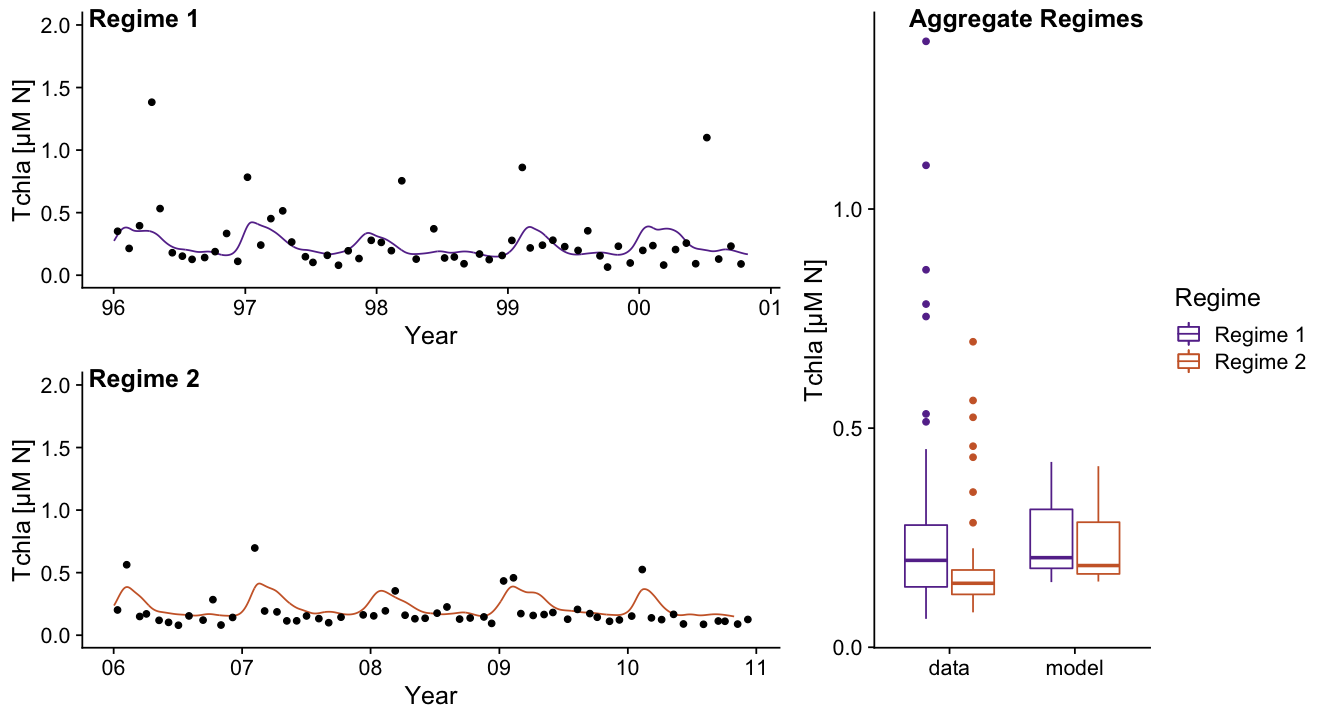

In [39]:
var_modelout = 'P1'
var_envdat = 'Chlorophyll_Box'
ylabel = 'Tchla [µM N]'
ymax = 2

p1 <- ggplot() + 
    geom_line(data=outarray_full_reg1, aes(date, !!ensym(var_modelout) + P2), col=colours[1]) +
    geom_point(data=BoxVSatDepth_reg1, aes(date, !!ensym(var_envdat)* muMolartoChlaconvfactor)) +
    #geom_point(data=BoxVSatDepth_reg1, aes(date, NO3_UDO_Box)) +
    theme_cowplot(15) + ylim(0,ymax)+
    scale_x_date(date_breaks = "years", labels = date_format('%y'))+
    ylab(ylabel) + xlab('Year') 

p2 <- ggplot() +
    geom_line(data=outarray_full_reg2, aes(date, !!ensym(var_modelout) + P2), col=colours[2]) +
    geom_point(data=BoxVSatDepth_reg2, aes(date, !!ensym(var_envdat) * muMolartoChlaconvfactor)) +
    #geom_point(data=BoxVSatDepth_reg2, aes(date, NO3_UDO_Box)) +
    theme_cowplot(15)+ ylim(0,ymax)+
    scale_x_date(date_breaks = "years", labels = date_format('%y'))+
    ylab(ylabel) + xlab('Year') 

p3 <- ggplot() +
      geom_boxplot(data=outarray_full_bothreg, aes('model', !!ensym(var_modelout)+P2, col=reg)) +
      geom_boxplot(data=BoxVSatDepth_bothreg, aes('data', !!ensym(var_envdat) * muMolartoChlaconvfactor, col=reg)) +
      theme_cowplot(15)+ xlab('') + #ylim(0,ymax)+
      ylab(ylabel) + scale_color_manual(values=colours) + labs(col='Regime')

x1 <- plot_grid(p1, p2, labels = c('Regime 1', 'Regime 2'), label_size=15, hjust = -0.8, ncol=1)

plot_grid(x1, p3, labels = c('', 'Aggregate Regimes'), label_size = 15, ncol=2, rel_widths = c(3,2)) 

Warning message:
“Removed 1706 rows containing missing values (geom_point).”Warning message:
“Removed 1706 rows containing non-finite values (stat_boxplot).”

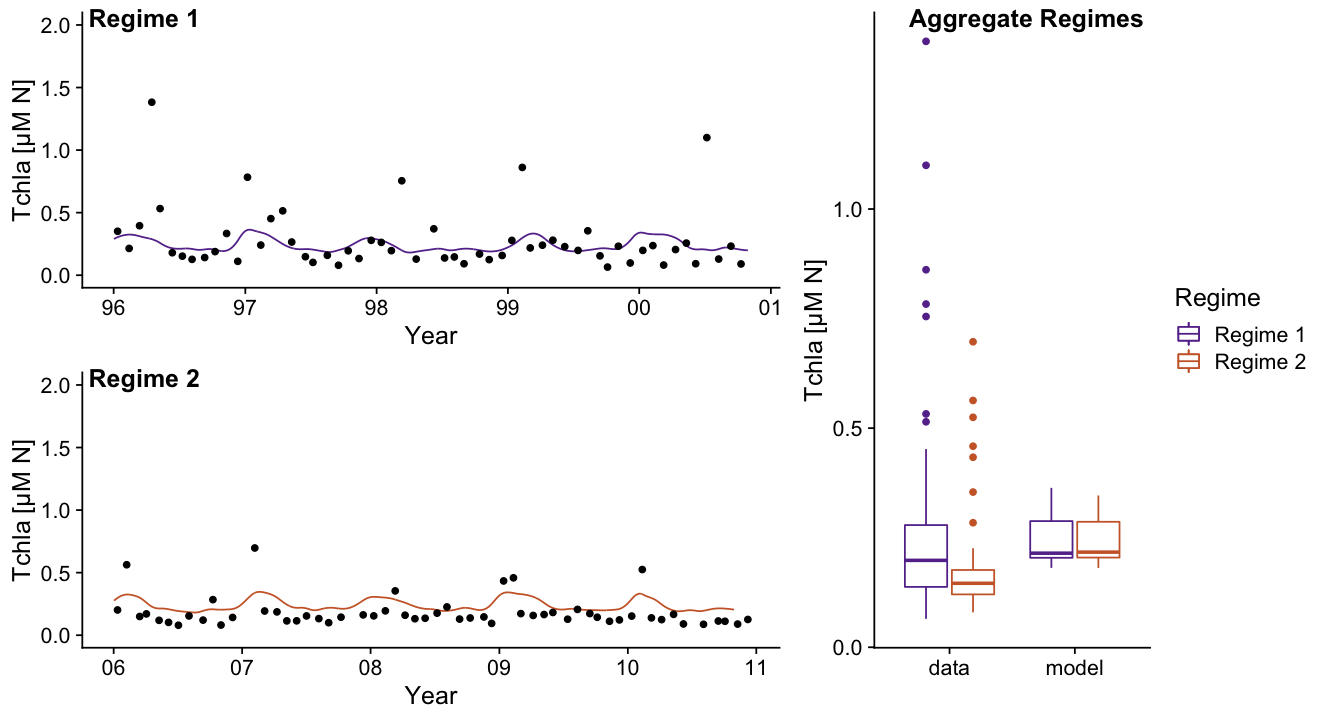

In [45]:
var_modelout = 'P1'
var_envdat = 'Chlorophyll_Box'
ylabel = 'Tchla [µM N]'
ymax = 2

p1 <- ggplot() + 
    geom_line(data=outarray_full_reg1, aes(date, !!ensym(var_modelout) + P2), col=colours[1]) +
    geom_point(data=BoxVSatDepth_reg1, aes(date, !!ensym(var_envdat)* muMolartoChlaconvfactor)) +
    #geom_point(data=BoxVSatDepth_reg1, aes(date, NO3_UDO_Box)) +
    theme_cowplot(15) + ylim(0,ymax)+
    scale_x_date(date_breaks = "years", labels = date_format('%y'))+
    ylab(ylabel) + xlab('Year') 

p2 <- ggplot() +
    geom_line(data=outarray_full_reg2, aes(date, !!ensym(var_modelout) + P2), col=colours[2]) +
    geom_point(data=BoxVSatDepth_reg2, aes(date, !!ensym(var_envdat) * muMolartoChlaconvfactor)) +
    #geom_point(data=BoxVSatDepth_reg2, aes(date, NO3_UDO_Box)) +
    theme_cowplot(15)+ ylim(0,ymax)+
    scale_x_date(date_breaks = "years", labels = date_format('%y'))+
    ylab(ylabel) + xlab('Year') 

p3 <- ggplot() +
      geom_boxplot(data=outarray_full_bothreg, aes('model', !!ensym(var_modelout)+P2, col=reg)) +
      geom_boxplot(data=BoxVSatDepth_bothreg, aes('data', !!ensym(var_envdat) * muMolartoChlaconvfactor, col=reg)) +
      theme_cowplot(15)+ xlab('') + #ylim(0,ymax)+
      ylab(ylabel) + scale_color_manual(values=colours) + labs(col='Regime')

x1 <- plot_grid(p1, p2, labels = c('Regime 1', 'Regime 2'), label_size=15, hjust = -0.8, ncol=1)

plot_grid(x1, p3, labels = c('', 'Aggregate Regimes'), label_size = 15, ncol=2, rel_widths = c(3,2)) 

# FULL TIME SERIES PLOTS

In [113]:
#ggsave('test_TS_plot.pdf',test_TS_plot, width=11, height=6  )

In [114]:
#CHLA_df

library(padr)

In [115]:
test1 = data.frame(date = CHLA_df$date, Tchla = CHLA_df$Tchla)

In [119]:
NAmonths <- test1 %>% 
    pad %>% 
    add_column('month'=as.integer(format(.$date, format='%m'))) %>%
    add_column('year'=format(.$date, format='%Y')) %>%
    group_by(year,month)%>%
    summarise(non_na_count = sum(!is.na(Tchla))) %>%
    filter(non_na_count == 0) %>%
    add_column('date'=as.Date(paste(.$year,'-',.$month,'-15',sep=''))) #%>%
    #sum(Tchla)
    
#(by=date_month, interval = 'month')

pad applied on the interval: day


In [120]:
str(CHLA_df)
str(NAmonths)

'data.frame':	162 obs. of  25 variables:
 $ X               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ date            : Date, format: "1995-12-14" "1996-01-13" ...
 $ Tchla           : num  13.5 44.2 28.8 21.3 171.9 ...
 $ TchlaX0.55m     : num  11.3 41.9 25.4 20.2 167.8 ...
 $ TchlaX55.100m   : num  2.2 2.27 3.33 1.05 4.14 ...
 $ Prasino3        : num  2.54 1.43 1.64 0.49 1.11 1.11 4.43 0.89 4.19 0.82 ...
 $ Prasino3X0.55m  : num  1.93 0.96 1.08 0.37 0.84 0.92 3.6 0.52 2.04 0.49 ...
 $ Prasino3X55.100m: num  0.61 0.47 0.56 0.12 0.27 0.19 0.83 0.37 2.15 0.33 ...
 $ Crypto1         : num  0.66 1.08 1.93 0.92 2.76 0.22 3.81 0.19 0.14 0.64 ...
 $ Crypto1X0.55m   : num  0.66 1.08 1.81 0.92 2.76 0.22 3.13 0.19 0.14 0.33 ...
 $ Crypto1X55.100m : num  0 0 0.12 0 0 0 0.68 0 0 0.31 ...
 $ Hapto6          : num  2.67 3.03 2.18 2.05 50.81 ...
 $ Hapto6X0.55m    : num  2.13 2.55 1.79 1.84 50.01 ...
 $ Hapto6X55.100m  : num  0.54 0.48 0.39 0.21 0.8 0.38 1.1 1.37 2.54 5.88 ...
 $ Chloro1         : num  0 0

In [121]:
CHLA_df_pad <- bind_rows(CHLA_df, NAmonths)

## TODO:
- add regime boundaries
- create one panel: CARIACO physics
- create another panel: CARIACO biological community
- * (in illustrator) add small indicator for Sardine fisheries collapse in 2004 *

Warning message:
“Ignoring unknown aesthetics: method”Warning message:
“Ignoring unknown aesthetics: method”Warning message:
“Removed 28 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 28 rows containing missing values (geom_point).”Warning message:
“Removed 192 rows containing missing values (geom_point).”`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
“Removed 9 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 9 rows containing missing values (geom_point).”

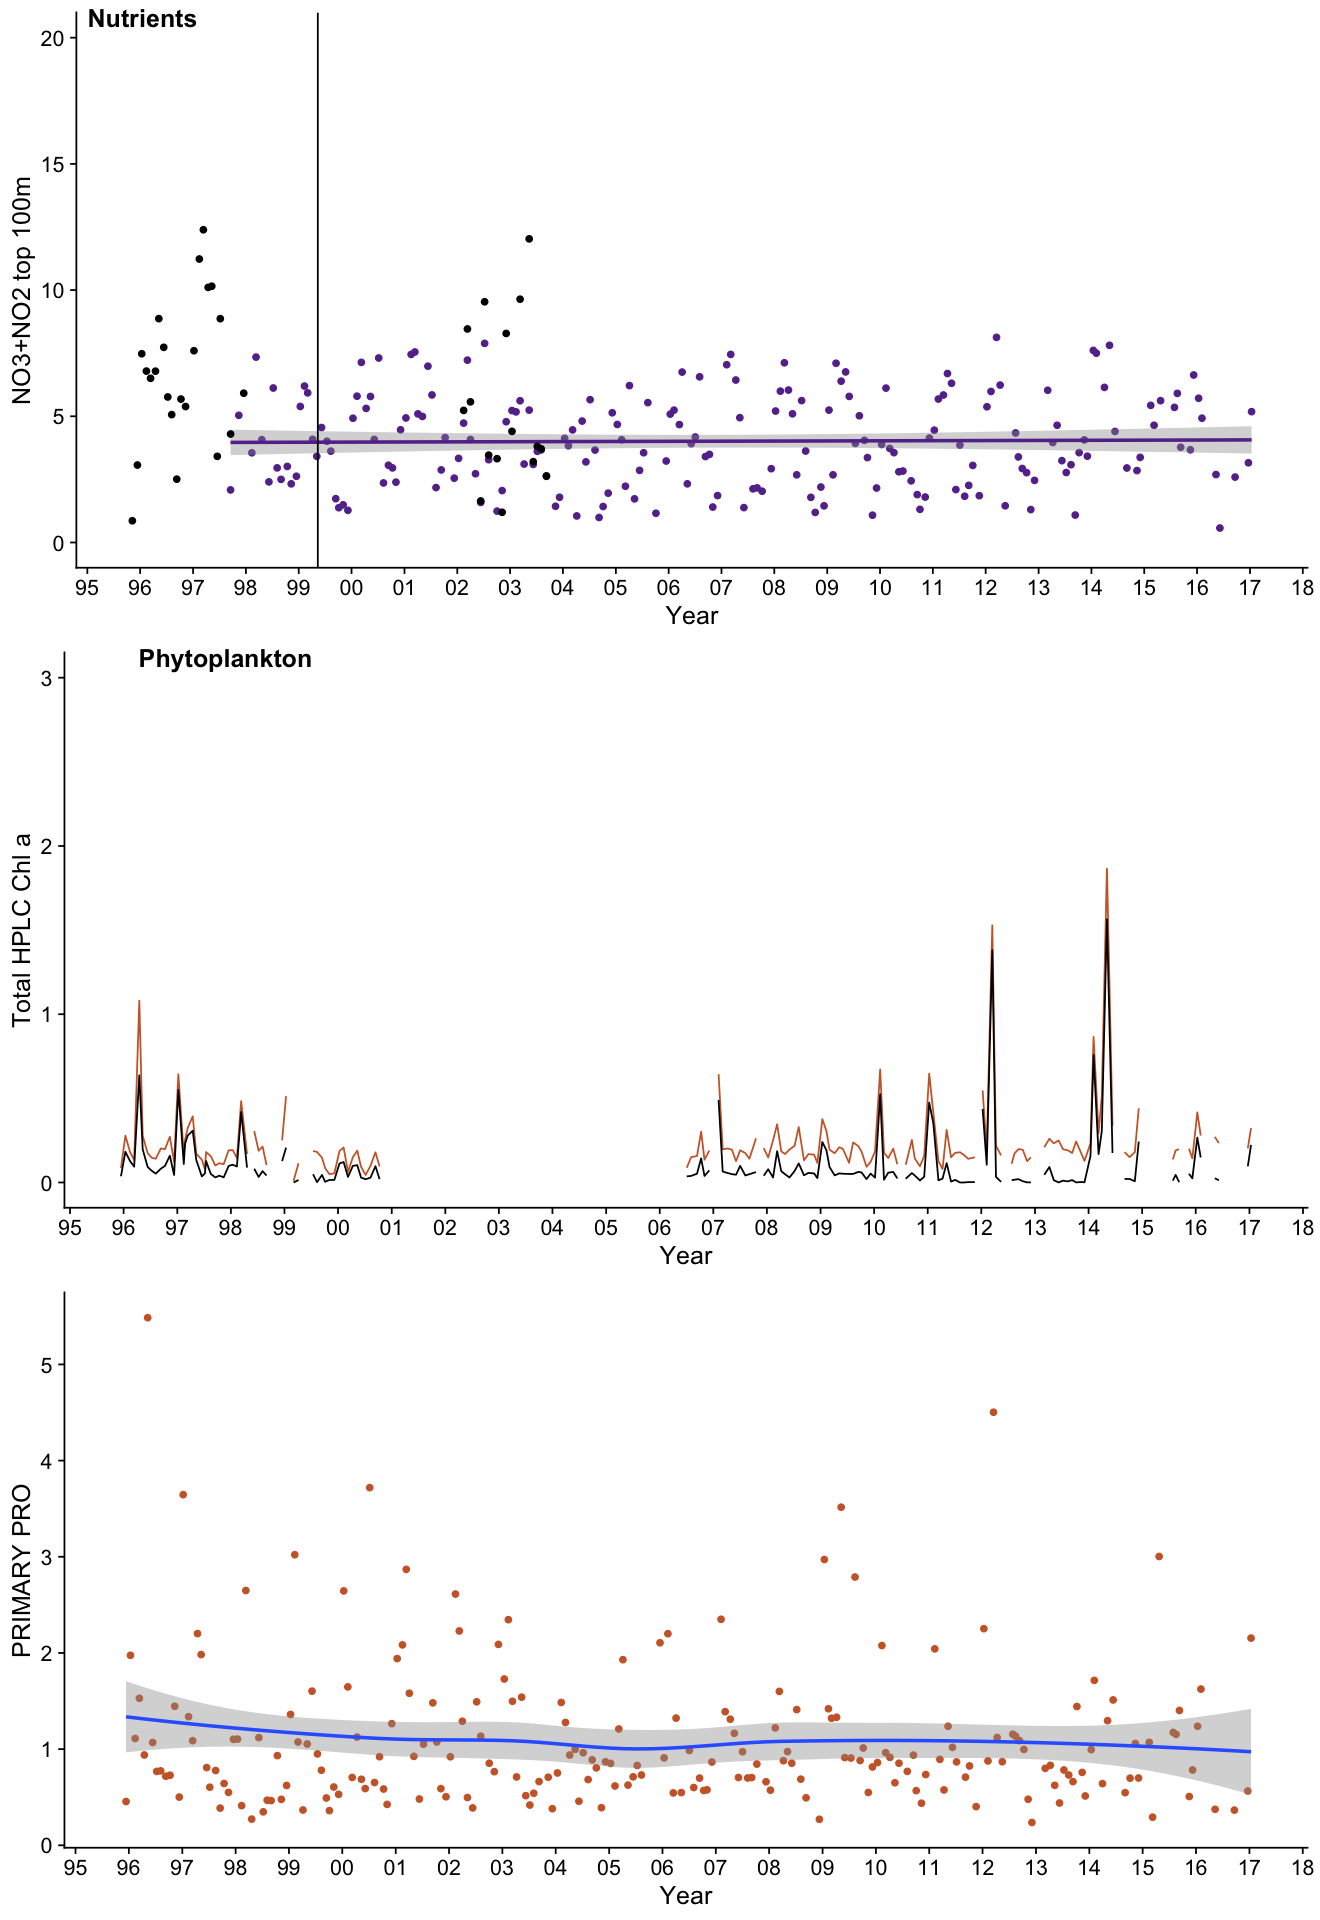

In [132]:
options(repr.plot.width=11, repr.plot.height=16)

p1 <- ggplot() + 
    geom_point(data=BoxVSatDepth, aes(date, NO3_NO2_USF_Box), col=colours[1]) +

    geom_smooth(data=BoxVSatDepth, aes(date, NO3_NO2_USF_Box), col=colours[1], method='lm') +
    geom_point(data=BoxVSatDepth, aes(date, NO3_UDO_Box)) +
    #geom_point(data=BoxVSatDepth_reg1, aes(date, NO3_UDO_Box)) +
    theme_cowplot(15) + ylim(0,20)+
    scale_x_date(date_breaks = "years", labels = date_format('%y'))+
    ylab('NO3+NO2 top 100m') + xlab('Year') +
    # Time Lines!
    geom_vline(xintercept=as.Date('1999-05-13'))

p2 <- ggplot() +
    geom_line(data=CHLA_df_pad, aes(date, Tchla * muMolartoChlaconvfactor / 100), col=colours[2]) +
    geom_line(data=CHLA_df_pad, aes(date, Diatom1 * muMolartoChlaconvfactor / 100)) +
    #geom_point(data=BoxVSatDepth_reg2, aes(date, NO3_UDO_Box)) +
    theme_cowplot(15)+ ylim(0,3)+
    scale_x_date(date_breaks = "years", labels = date_format('%y'))+
    ylab('Total HPLC Chl a') + xlab('Year') 

px <- ggplot() +
    geom_point(data=BoxVSatDepth, aes(date, PO4_USF_Box), col=colours[2]) +
    stat_smooth(data=BoxVSatDepth, aes(date, PO4_USF_Box, method='glm')) +
    #geom_point(data=BoxVSatDepth_reg2, aes(date, NO3_UDO_Box)) +
    theme_cowplot(15)+ #ylim(0,3)+
    scale_x_date(date_breaks = "years", labels = date_format('%y'))+
    ylab('PRIMARY PRO') + xlab('Year') 

p3 <- ggplot() +
    geom_point(data=BoxVSatDepth, aes(date, PrimaryProductivity_Box), col=colours[2]) +
    stat_smooth(data=BoxVSatDepth, aes(date, PrimaryProductivity_Box, method='glm')) +
    #geom_point(data=BoxVSatDepth_reg2, aes(date, NO3_UDO_Box)) +
    theme_cowplot(15)+ #ylim(0,3)+
    scale_x_date(date_breaks = "years", labels = date_format('%y'))+
    ylab('PRIMARY PRO') + xlab('Year') 

#test_TS_plot <- 
plot_grid(p1, p2, p3, labels = c('Nutrients', 'Phytoplankton'), label_size=15, hjust = -0.8, ncol=1)


In [ ]:
options(repr.plot.width=11, repr.plot.height=6)

# MODEL OUTPUT PLOT

create single visual representation of model output (both for NPZD and more complex example)
                                                     
show state variables per regime
                                                
or show full TS output, next to regime boxplot?

                                                     